# Dynophore notebook

This notebook contains the following dynophore analyses:

- __2D view__ of the dynophore's superfeatures mapped onto the structure-bound ligand.
- __3D view__ of the dynophore's point clouds (one cloud per superfeature) using `nglview` allows easy visual inspection of the dynamic macromolecule-ligand interactions. Point clouds are rendered alongside the topology and (optionally) the trajectory underlying the dynophore.
- __Statistics__ cover the occurrence of superfeatures and their environmental partners as well as distances between them.
- __Dynophore data__ can be further analyzed conveniently right here in this notebook by working with the `Dynophore` class.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import nglview as nv

# Import Dynophore class - contains all dynophore data
from dynophores import Dynophore

# Load modules for 3D viewing and plotting
from dynophores import view2d, view3d, plot

## Set paths

In [3]:
DATA = Path("../../dynophores/tests/data")
dyno_path = DATA / "out"
pdb_path = DATA / "in/startframe.pdb"
dcd_path = DATA / "in/trajectory.dcd"

__Note__: You can set `dcd_path = None` in case you do not want to view the trajectory.

## Load data as `Dynophore` object

In [4]:
dynophore = Dynophore.from_dir(dyno_path)

__Note__: Check out [this tutorial](https://dynophores.readthedocs.io/en/latest/tutorials/explore_data.html) on the dynophore's data structure.

## 2D view

In [5]:
view2d.interactive.show(dynophore);

interactive(children=(Checkbox(value=False, description='Show superfeatures'), Checkbox(value=False, descripti…

## 3D view

In [7]:
view = view3d.show(dynophore, pdb_path, dcd_path)
view.display(gui=True, style="ngl")

NGLWidget(gui_style='ngl', max_frame=1001)

In [8]:
view.render_image(trim=True, factor=2, transparent=True);

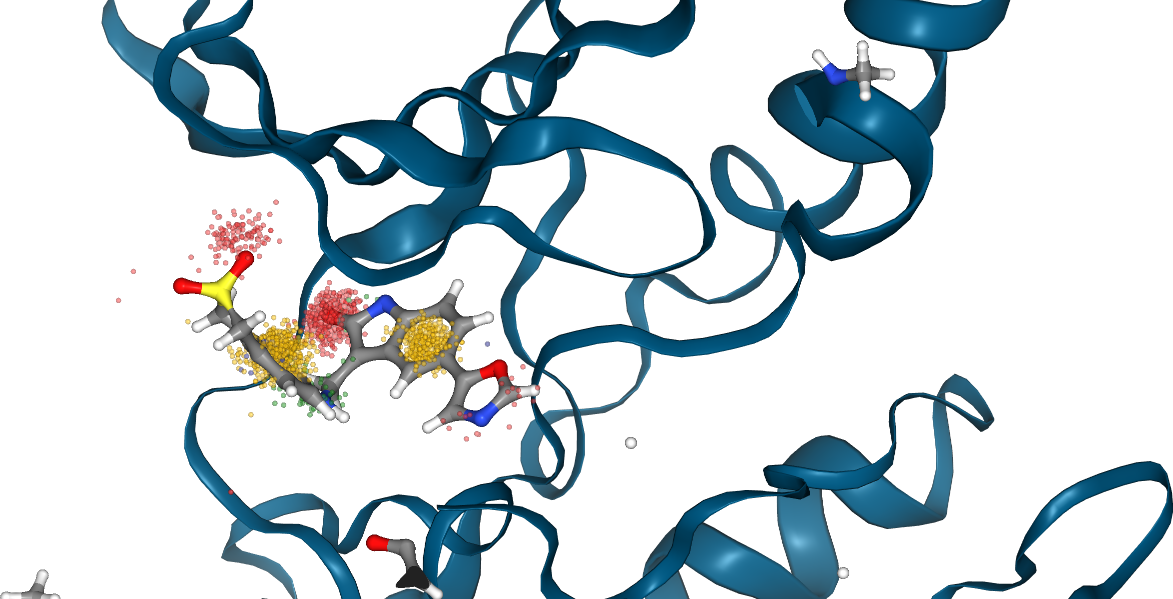

In [9]:
view._display_image()

In case a trajectory is Load the `TrajectoryPlayer` for more visualization options:

In [10]:
nv.player.TrajectoryPlayer(view)

## Statistics

### Plot interactions overview (heatmap)

In [11]:
plot.interactive.superfeatures_vs_envpartners(dynophore);

interactive(children=(SelectMultiple(description='Superfeature ID(s):', index=(0,), options=('all', 'H[4599,46…

### Plot superfeature occurrences (time series)

In [12]:
plot.interactive.superfeatures_occurrences(dynophore);

interactive(children=(SelectMultiple(description='Superfeature ID(s):', index=(0,), options=('all', 'H[4599,46…

### Plot interactions for example superfeature (time series)

#### Interaction occurrence

In [13]:
plot.interactive.envpartners_occurrences(dynophore);

interactive(children=(SelectMultiple(description='Superfeature ID(s):', index=(0,), options=('H[4599,4602,4601…

#### Interaction distances

In [14]:
plot.interactive.envpartners_distances(dynophore);

interactive(children=(SelectMultiple(description='Superfeature ID(s):', index=(0,), options=('H[4599,4602,4601…

#### Interaction profile (all-in-one)

In [15]:
plot.interactive.envpartners_all_in_one(dynophore);

interactive(children=(Select(description='Superfeature ID(s):', options=('H[4599,4602,4601,4608,4609,4600]', '…